In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [5]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "D:\python\classifier\minerals\minet",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "D:\python\classifier\minerals\minet",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "D:\python\classifier\minerals\minet",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 957 files belonging to 7 classes.
Found 957 files belonging to 7 classes.
Found 957 files belonging to 7 classes.


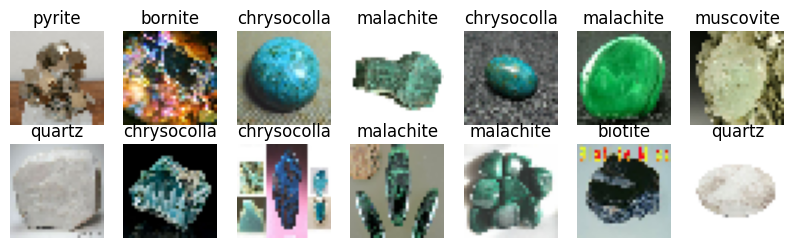

In [6]:
class_names = ["biotite", "bornite", "chrysocolla" , "malachite" , "muscovite" ,"pyrite" ,"quartz"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(14):
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(7)
    ]
)

In [8]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [9]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
48/48 [==============================] - 8s 139ms/step - loss: 1.5592 - accuracy: 0.3866 - val_loss: 1.1920 - val_accuracy: 0.5266
Epoch 2/30
48/48 [==============================] - 7s 137ms/step - loss: 1.3023 - accuracy: 0.4943 - val_loss: 1.0339 - val_accuracy: 0.6259
Epoch 3/30
48/48 [==============================] - 7s 131ms/step - loss: 0.9893 - accuracy: 0.6196 - val_loss: 0.8365 - val_accuracy: 0.6761
Epoch 4/30
48/48 [==============================] - 7s 126ms/step - loss: 0.9236 - accuracy: 0.6625 - val_loss: 0.8154 - val_accuracy: 0.6803
Epoch 5/30
48/48 [==============================] - 7s 130ms/step - loss: 0.8390 - accuracy: 0.6803 - val_loss: 0.7023 - val_accuracy: 0.7503
Epoch 6/30
48/48 [==============================] - 7s 131ms/step - loss: 0.7452 - accuracy: 0.7262 - val_loss: 0.6441 - val_accuracy: 0.7659
Epoch 7/30
48/48 [==============================] - 7s 134ms/step - loss: 0.7127 - accuracy: 0.7315 - val_loss: 0.7516 - val_accuracy: 0.7011
Epoch 

In [10]:
model.evaluate(test_ds)

48/48 [==============================] - 3s 54ms/step - loss: 0.1130 - accuracy: 0.9687


[0.11303500831127167, 0.9686520099639893]

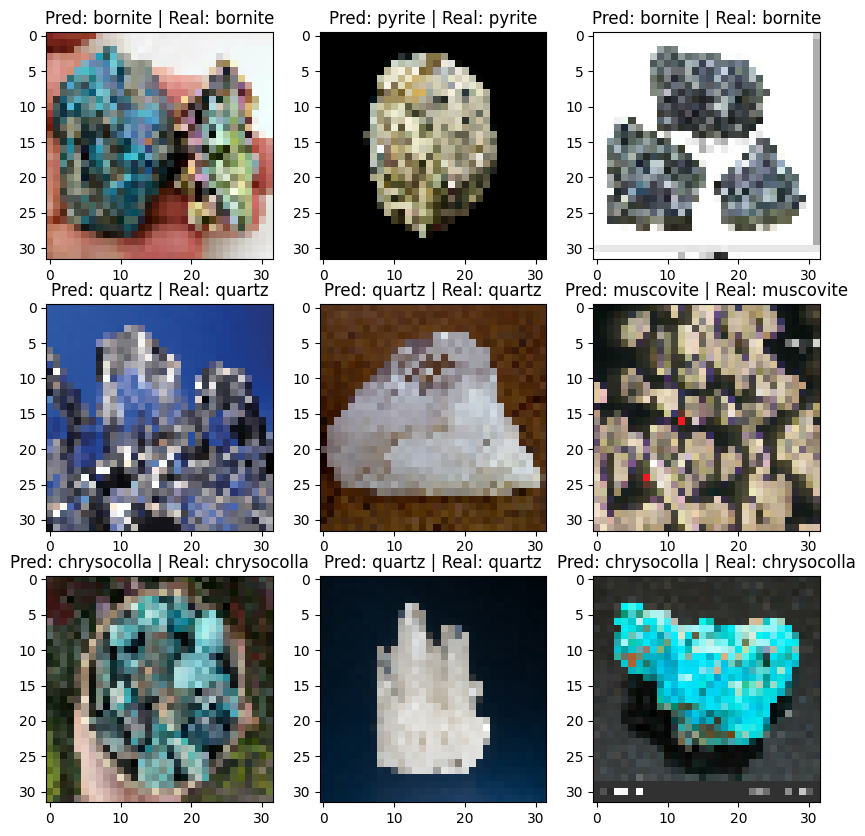

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [12]:
model.save('model.h5')